# **Section 2 Project**

## Project 문제 정의

### 배경

> 은행은 고객 **유치와 유지를** 위해 다양한 마케팅 활동을 수행합니다.
하지만, 고객 **이탈률이 높아서** 은행의 안정성과 **수익성이 저하**되는 경우가 발생할 수 있습니다.
고객 이탈을 예방하기 위해, 고객 이탈 원인을 파악하고 **예측**할 수 있는 시스템이 필요합니다.
이를 위해, 고객 데이터를 수집하고 분석하여 **고객 이탈 예측 모델**을 개발할 필요가 있습니다.

💰 **data description**

- `RowNumber` : 행(row) 번호
- `CustomerId` : 고객의 고유 식별 번호
- `Surname` : 고객의 성씨
- `CreditScore` : 고객의 신용점수
- `Geography` : 고객이 거주하는 지역
- `Gender` : 고객의 성별
- `Age` : 고객의 나이
- `Tenure` : 고객이 해당 은행을 이용한 기간(년)
- `Balance` : 고객의 계좌 잔액
- `NumOfProducts` :고객이 이용하는 금융상품 수
- `HasCrCard` : 고객이 신용카드를 보유하고 있는지 여부 (1:보유, 0:미보유)
- `IsActiveMember` : 고객이 현재 활성화되어 있는 멤버십에 가입되어 있는지 여부(1:가입,0:미가입)
- `EstimatedSalary` :고객의 예상 연봉
- `Exited` : 고객이 은행을 탈퇴한 여부 (1:탈퇴, 0:잔여)

### 라이브러리

라이브러리 설치

In [1]:
!pip install shap
!pip install category_encoders
!pip install pdpbox
!pip install xgboost==1.7.2
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


라이브러리

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
import sklearn
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.datasets import make_classification
#LinearRegression, Ridge,RidgeCV, Lasso,LassoCV,LogisticRegression,LogisticRegressionCV
from sklearn.linear_model import *
#r2_score, mean_absolute_error, mean_squared_error,accuracy_score,plot_confusion_matrix,classification_report, recall_score, precision_score, f1_score,roc_auc_score,roc_curve
from sklearn.metrics import *
#train_test_split, KFold, cross_val_score,GridSearchCV
from sklearn.model_selection import *
from sklearn.feature_selection import f_regression, SelectKBest
from category_encoders import OneHotEncoder,OrdinalEncoder

from sklearn.pipeline import make_pipeline


from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import *

import shap
from pdpbox.pdp import pdp_isolate, pdp_plot
from eli5.sklearn import PermutationImportance

### EDA


In [3]:
import pandas as pd
df = pd.read_csv("/content/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#정보 확인과 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#중복 데이터 확인
df.duplicated().sum()

0

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

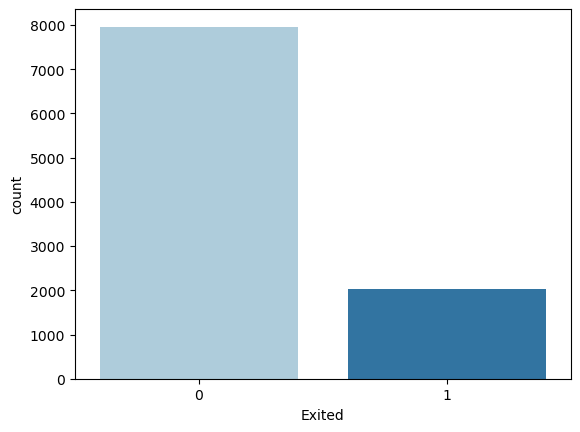

In [8]:
#타겟 비율 시각화
#팔레트 세팅 Paired
sns.set_palette('Paired')
sns.countplot(x='Exited', data=df)
plt.show()

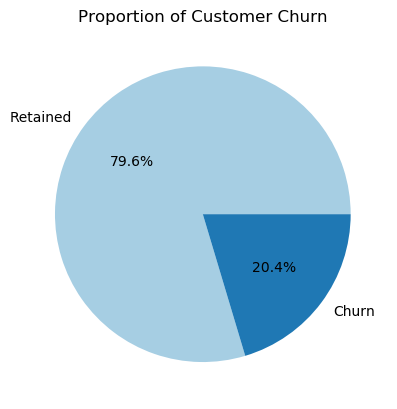

In [9]:
plt.pie(df['Exited'].value_counts(), labels=['Retained', 'Churn'], autopct='%1.1f%%')
plt.title('Proportion of Customer Churn')
plt.show()

In [10]:
def engineer(df):
    """특성 공학"""
    #불필요한 열 제거
    df.drop(columns=["RowNumber", "Surname"],axis=1,inplace=True)
    #CustomerId 특성을 인덱스로 변환
    df = df.set_index('CustomerId')
    #처음 계약한 나이
    df['Initial_Age'] = df['Age'] - df['Tenure']
    #고객의 예상 연봉 대비 계좌의 잔액
    df['BalSalRatio'] = df['Balance']/df['EstimatedSalary']  
    #고객의 나이에 대한 계좌 개설 기간
    df['TenByAge'] = df['Tenure']/df['Age']
    #고객의 나이에 대한 신용 점수
    df['CrdAgeIndx'] = df['CreditScore']/df['Age']
    return df


df = engineer(df.copy())

In [11]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
Initial_Age          75
BalSalRatio        6384
TenByAge            414
CrdAgeIndx         6112
dtype: int64

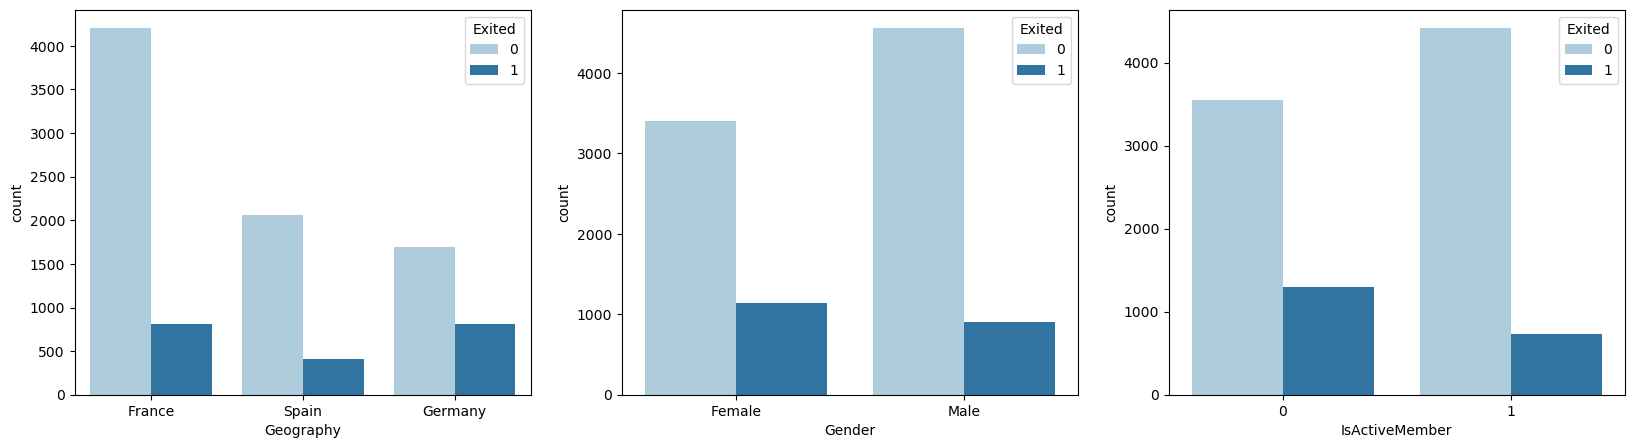

In [12]:
fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

#거주 지역
#프랑스가 많은 비중을 차지한다
sns.countplot(x='Geography', hue='Exited', data=df,ax=axarr[0])

#남성이 은행 이용 비중이 많다.
#여성고객이 남성 고객보다 탈퇴 비율이 높다
sns.countplot(x='Gender', hue='Exited', data=df,ax=axarr[1])

#맴버쉽에 가입되어 있는 사람이 탈퇴가 적다
sns.countplot(x='IsActiveMember', hue='Exited', data=df,ax=axarr[2])   
# #빈 그래프 제거
# plt.delaxes(axarr[2][1])

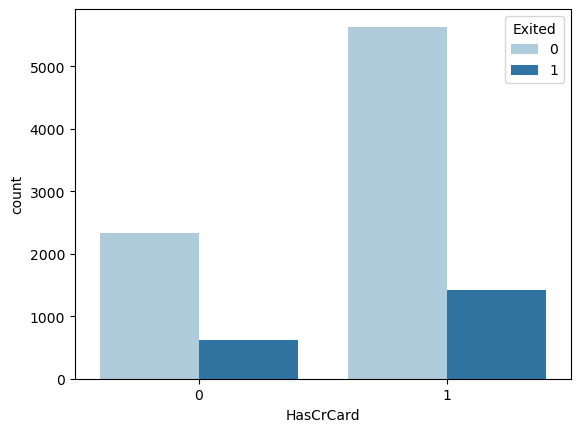

In [13]:
#신용카드를 보유한 고객이 탈퇴율이 높다
#하지만 비율로 따져보자. 총 인원수가 많아서 이런 비율이 나온걸수도
sns.countplot(x='HasCrCard', hue='Exited', data=df)

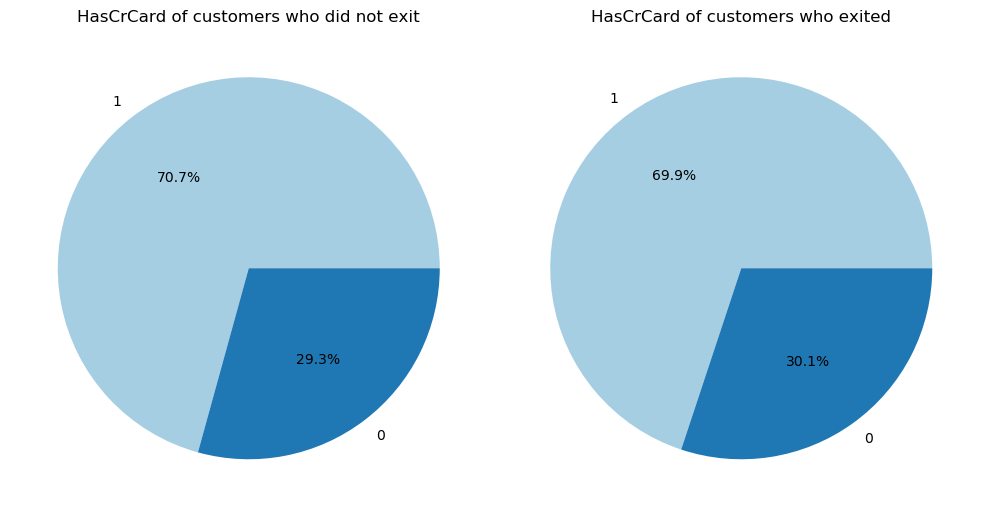

In [16]:
fig, axarr_pid_1 = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

# Exited가 0일 때의 원 그래프
counts1 = df[df['Exited']==0]['HasCrCard'].value_counts()
axarr_pid_1[0].pie(counts1, labels=counts1.index, autopct='%1.1f%%')
axarr_pid_1[0].set_title('HasCrCard of customers who did not exit')

# Exited가 1일 때의 원 그래프
counts2 = df[df['Exited']==1]['HasCrCard'].value_counts()
axarr_pid_1[1].pie(counts2, labels=counts2.index, autopct='%1.1f%%')
axarr_pid_1[1].set_title('HasCrCard of customers who exited')

fig.tight_layout()
plt.show()

위의 그래프로 내릴수 있는 결론
- 우선순위는 지역이 프랑스이면서 남성인 고객
- 신용카드를 발급하게 한다.
- 맴버쉽을 추천해서 가입 시킨다

In [17]:
target='Exited'
X=df.drop(target,axis=1)
y=df[target]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42,stratify=y)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=.2,random_state=42,stratify=y_train)
X_train.shape,X_val.shape,X_test.shape

((6400, 14), (1600, 14), (2000, 14))

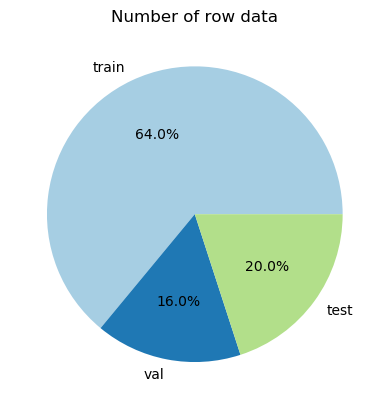

In [18]:
#train, val, tset데이터셋 비율 시각화 파이차트 8:2
train_row_size = len(X_train)
val_row_size = len(X_val)
test_row_size = len(X_test)

plt.pie([train_row_size, val_row_size,test_row_size], labels=['train', 'val','test'], autopct='%1.1f%%')
plt.title('Number of row data')
plt.show()

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6400 entries, 15720943 to 15618018
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      6400 non-null   int64  
 1   Geography        6400 non-null   object 
 2   Gender           6400 non-null   object 
 3   Age              6400 non-null   int64  
 4   Tenure           6400 non-null   int64  
 5   Balance          6400 non-null   float64
 6   NumOfProducts    6400 non-null   int64  
 7   HasCrCard        6400 non-null   int64  
 8   IsActiveMember   6400 non-null   int64  
 9   EstimatedSalary  6400 non-null   float64
 10  Initial_Age      6400 non-null   int64  
 11  BalSalRatio      6400 non-null   float64
 12  TenByAge         6400 non-null   float64
 13  CrdAgeIndx       6400 non-null   float64
dtypes: float64(5), int64(7), object(2)
memory usage: 750.0+ KB


In [20]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Initial_Age,BalSalRatio,TenByAge,CrdAgeIndx
CustomerId,,,,,,,,,,,,,,
15720943,747,France,Female,45,1,114959.12,1,1,0,189362.39,44,0.607085,0.022222,16.600000
15756070,585,Spain,Female,44,4,0.00,2,0,1,101728.46,40,0.000000,0.090909,13.295455
15800620,691,France,Female,29,9,0.00,2,0,0,199635.93,20,0.000000,0.310345,23.827586
15736816,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,34,0.804599,0.055556,21.000000
15707199,643,France,Male,36,0,148159.71,1,0,0,55835.66,36,2.653496,0.000000,17.861111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15776844,762,Spain,Female,19,6,0.00,2,1,0,55500.17,13,0.000000,0.315789,40.105263
15801559,693,Germany,Female,41,9,181461.48,3,1,1,187929.43,32,0.965583,0.219512,16.902439
15634180,729,Germany,Male,26,4,97268.10,2,1,0,39356.38,22,2.471470,0.153846,28.038462


In [21]:
# #스케일링
# scaler = MinMaxScaler()
# scaler_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Initial_Age','BalSalRatio','TenByAge',	'CrdAgeIndx']
# X_train[scaler_cols] = scaler.fit_transform(X_train[scaler_cols])
# X_val[scaler_cols] = scaler.transform(X_val[scaler_cols])

In [22]:
#인코딩
encoder = OrdinalEncoder(cols=['Geography','Gender'])
X_train_encoder = encoder.fit_transform(X_train)
X_val_encoder = encoder.transform(X_val)
X_test_encoder = encoder.transform(X_test)

In [23]:
X_train_encoder

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Initial_Age,BalSalRatio,TenByAge,CrdAgeIndx
CustomerId,,,,,,,,,,,,,,
15720943,747,1,1,45,1,114959.12,1,1,0,189362.39,44,0.607085,0.022222,16.600000
15756070,585,2,1,44,4,0.00,2,0,1,101728.46,40,0.000000,0.090909,13.295455
15800620,691,1,1,29,9,0.00,2,0,0,199635.93,20,0.000000,0.310345,23.827586
15736816,756,3,2,36,2,136815.64,1,1,1,170041.95,34,0.804599,0.055556,21.000000
15707199,643,1,2,36,0,148159.71,1,0,0,55835.66,36,2.653496,0.000000,17.861111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15776844,762,2,1,19,6,0.00,2,1,0,55500.17,13,0.000000,0.315789,40.105263
15801559,693,3,1,41,9,181461.48,3,1,1,187929.43,32,0.965583,0.219512,16.902439
15634180,729,3,2,26,4,97268.10,2,1,0,39356.38,22,2.471470,0.153846,28.038462


### 모델 비교
- DecisionTreeClassifier
- XGBClassifier
- RandomForestClassifier

#### DecisionTreeClassifier
- 

In [24]:
wt0 = np.linspace(0.01, 0.99, 99)
params = {'class_weight': [{0:x, 1:1.0-x} for x in wt0],
          "max_depth": np.arange(1,11,1),
          'max_features': np.arange(1,11,1),
          'min_samples_split': np.arange(1,11,1),
          }

In [25]:
#랜덤서치
model_dtc = DecisionTreeClassifier(
    random_state=42,
    criterion='gini',
    )
clf_dtc = RandomizedSearchCV(model_dtc, param_distributions=params, cv=3, n_iter=5, scoring='accuracy',random_state=42,verbose=0)
clf_dtc.fit(X_train_encoder, y_train)
print("Optimal Hyperparameter:", clf_dtc.best_params_)
print("Accuracy:", clf_dtc.best_score_)

y_val_pred_dtc = clf_dtc.predict(X_val_encoder)
print(classification_report(y_val, y_val_pred_dtc))

cv_scores_train = cross_val_score(clf_dtc, X_train_encoder, y_train, cv=3)
cv_scores_val = cross_val_score(clf_dtc, X_val_encoder, y_val, cv=3)

print("Train Average score:", np.mean(cv_scores_train))
print("Validation Average score:", np.mean(cv_scores_val))

Optimal Hyperparameter: {'min_samples_split': 7, 'max_features': 9, 'max_depth': 9, 'class_weight': {0: 0.55, 1: 0.44999999999999996}}
Accuracy: 0.8362500408261425
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1274
           1       0.72      0.40      0.51       326

    accuracy                           0.85      1600
   macro avg       0.79      0.68      0.71      1600
weighted avg       0.83      0.85      0.83      1600

Train Average score: 0.8362500408261425
Validation Average score: 0.8187572757317892


In [26]:
# params = {
#           "max_depth": [5,6,7],
#           'max_features': [3,4,5],
#           'min_samples_split':[5,6,7],
#           }

In [27]:
# #그리드서치
# model_dtc = DecisionTreeClassifier(
#     random_state=42,
#     class_weight={0: 0.57, 1: 0.43},
#     criterion='gini',
#     )
# gscv_dtc = GridSearchCV(model_dtc,params, cv=3, scoring='accuracy',verbose=0)
# gscv_dtc.fit(X_train_encoder, y_train)
# print("Optimal Hyperparameter:", gscv_dtc.best_params_)
# print("Accuracy:", gscv_dtc.best_score_)

# y_val_pred_dtc = gscv_dtc.predict(X_val_encoder)
# print(classification_report(y_val, y_val_pred_dtc))

#### XGBClassifier
- 

In [28]:
params = {
      "n_estimators": np.arange(100,1100,100),
      "gamma": np.arange(1,21,1),
      "max_depth": np.arange(1,21,1),
      "min_child_weight": np.arange(1,21,1),
}

In [29]:
#XGBClassifier 랜덤 서치
model_xgb = XGBClassifier(
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
)
clf_xgb = RandomizedSearchCV(model_xgb, param_distributions=params, cv=3, n_iter=5, scoring='accuracy',random_state=42,verbose=0)
clf_xgb.fit(X_train_encoder, y_train)
print("Optimal Hyperparameter:", clf_xgb.best_params_)
print("Accuracy:", clf_xgb.best_score_)

y_val_pred_xgb = clf_xgb.predict(X_val_encoder)
print(classification_report(y_val, y_val_pred_xgb))

cv_scores_train = cross_val_score(clf_xgb, X_train_encoder, y_train, cv=3)
cv_scores_val = cross_val_score(clf_xgb, X_val_encoder, y_val, cv=3)

print("Train Average score:", np.mean(cv_scores_train))
print("Validation Average score:", np.mean(cv_scores_val))

Optimal Hyperparameter: {'n_estimators': 600, 'min_child_weight': 20, 'max_depth': 19, 'gamma': 4}
Accuracy: 0.8596874687396241
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1274
           1       0.75      0.49      0.59       326

    accuracy                           0.86      1600
   macro avg       0.81      0.72      0.75      1600
weighted avg       0.85      0.86      0.85      1600

Train Average score: 0.858906169880984
Validation Average score: 0.8368772149259954


In [30]:
# params = {
#       "n_estimators": [500,600,700],
#       "max_depth": [7,8,9],
#       "min_child_weight": [8,9,10],
#       "gamma": [14,15,16],
# }

In [31]:
# #XGBClassifier 그리드 서치
# model_xgb = XGBClassifier(
#     random_state=42,
#     n_jobs=-1,
#     use_label_encoder=False,
# )
# gscv_xgb = GridSearchCV(model_xgb,params, cv=3, scoring='accuracy',verbose=0)
# gscv_xgb.fit(X_train_encoder, y_train)
# print("Optimal Hyperparameter:", gscv_xgb.best_params_)
# print("Accuracy:", gscv_xgb.best_score_)

# y_val_pred_xgb = gscv_xgb.predict(X_val_encoder)
# print(classification_report(y_val, y_val_pred_xgb))

#### RandomForestClassifier
- 

In [32]:
wt0 = np.linspace(0.01, 0.99, 99)
params = {'class_weight': [{0:x, 1:1.0-x} for x in wt0],
          "n_estimators": np.arange(100,600,100),
          "max_depth": np.arange(1,11,1),
          'max_features': np.arange(1,11,1),
          'min_samples_split': np.arange(1,11,1),
          }

In [33]:
model_rfc = RandomForestClassifier(
    random_state=42,
    criterion='gini',
    n_jobs=-1,
    )


clf_rfc = RandomizedSearchCV(model_rfc, param_distributions=params, cv=3, n_iter=5, scoring='accuracy',random_state=42,verbose=0)
clf_rfc.fit(X_train_encoder, y_train)
print("Optimal Hyperparameter:", clf_rfc.best_params_)
print("Accuracy:", clf_rfc.best_score_)

y_val_pred_rfc = clf_rfc.predict(X_val_encoder)
print(classification_report(y_val, y_val_pred_rfc))

cv_scores_train = cross_val_score(clf_rfc, X_train_encoder, y_train, cv=3)
cv_scores_val = cross_val_score(clf_rfc, X_val_encoder, y_val, cv=3)

print("Train Average score:", np.mean(cv_scores_train))
print("Validation Average score:", np.mean(cv_scores_val))

Optimal Hyperparameter: {'n_estimators': 400, 'min_samples_split': 6, 'max_features': 4, 'max_depth': 9, 'class_weight': {0: 0.52, 1: 0.48}}
Accuracy: 0.8587504813090963
              precision    recall  f1-score   support

           0       0.86      0.97      0.92      1274
           1       0.80      0.40      0.54       326

    accuracy                           0.86      1600
   macro avg       0.83      0.69      0.73      1600
weighted avg       0.85      0.86      0.84      1600

Train Average score: 0.8587504813090963
Validation Average score: 0.8418791707363918


In [34]:
# params = {
#           "n_estimators": [300,400,500],
#           "max_depth": [10,11,12],
#           'max_features': [3,4,5],
#           'min_samples_split': [3,4,5],
#           }

In [35]:
# model_rfc = RandomForestClassifier(
#     random_state=42,
#     criterion='gini',
#     class_weight= {0: 0.52, 1: 0.48},
#     n_jobs=-1,
#     )

# gscv_rfc = GridSearchCV(model_rfc,params, cv=3, scoring='accuracy',verbose=0)
# gscv_rfc.fit(X_train_encoder, y_train)
# print("Optimal Hyperparameter:", gscv_rfc.best_params_)
# print("Accuracy:", gscv_rfc.best_score_)

# y_val_pred_rfc = gscv_rfc.predict(X_val_encoder)
# print(classification_report(y_val, y_val_pred_rfc))

#### 모델들의 결과 비교

XGBClassifier
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1274
           1       0.75      0.49      0.59       326

    accuracy                           0.86      1600
   macro avg       0.81      0.72      0.75      1600
weighted avg       0.85      0.86      0.85      1600

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.86      0.97      0.92      1274
           1       0.80      0.40      0.54       326

    accuracy                           0.86      1600
   macro avg       0.83      0.69      0.73      1600
weighted avg       0.85      0.86      0.84      1600

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1274
           1       0.72      0.40      0.51       326

    accuracy                           0.85      1600
   macro avg       0.79      0.68      0.71      1600
weighted avg  

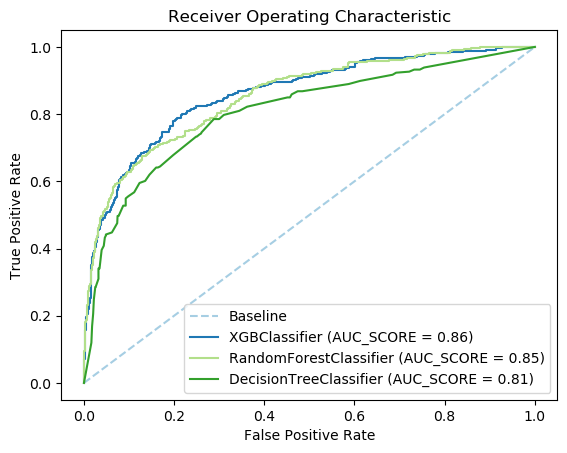

In [36]:
def predict(X, y, best_estimator):
    y_pred_proba = None

    # YOUR CODE HERE
    y_pred_proba=best_estimator.predict_proba(X)[:, 1]
    # YOUR CODE ENDS HERE

    report = classification_report(y, y_pred_proba > 0.5)
    return y_pred_proba, report

def plot_roc(y, y_pred_proba_list,estimator):
    plt.plot([0, 1], [0, 1], linestyle="--", label="Baseline")

    for i, y_pred_proba in enumerate(y_pred_proba_list):
        fpr, tpr, _ = roc_curve(y, y_pred_proba)
        auc_score = roc_auc_score(y, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{type(estimator[i]).__name__} (AUC_SCORE = {auc_score:.2f})")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend()
    plt.show()
    return

model_best_estimators = [clf_xgb.best_estimator_, clf_rfc.best_estimator_, clf_dtc.best_estimator_]
y_val_pred_proba_list = []

for estimator in model_best_estimators:
    y_val_pred_proba, report = predict(X_val_encoder, y_val, estimator)
    y_val_pred_proba_list.append(y_val_pred_proba)
    print(type(estimator).__name__)
    print(report)
plot_roc(y_val, y_val_pred_proba_list,model_best_estimators)

### PermutationImportance(순열중요도)
- 가장 좋은 모델에서의 순열 중요도 확인

In [37]:
permuter = PermutationImportance(
    clf_xgb.best_estimator_,
    scoring='accuracy',
    n_iter=5, 
    random_state=42
)
permuter.fit(X_val_encoder, y_val)

PermutationImportance(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=4,
                                              gpu_id=-1,
                                              grow_policy='depthwise',
                                              importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_bin=256, max_cat_threshold=64,
                                              max_cat_to_onehot=4,
                                              max_delta_step=0, max_depth=19,
                                              max_leaves=0, min_child_weight=20,
                                              missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=600, n_jobs=-1,
                                              num_parallel_tree=1,
                                              predictor='auto', random_state=42, ...),
                      random_state=42, scoring='accuracy')

In [38]:
permuter2 = PermutationImportance(
    clf_rfc.best_estimator_,
    scoring='accuracy',
    n_iter=5, 
    random_state=42
)
permuter2.fit(X_val_encoder, y_val)

PermutationImportance(estimator=RandomForestClassifier(class_weight={0: 0.52,
                                                                     1: 0.48},
                                                       max_depth=9,
                                                       max_features=4,
                                                       min_samples_split=6,
                                                       n_estimators=400,
                                                       n_jobs=-1,
                                                       random_state=42),
                      random_state=42, scoring='accuracy')

Text(0.5, 1.0, 'XGB Permutation Importance')

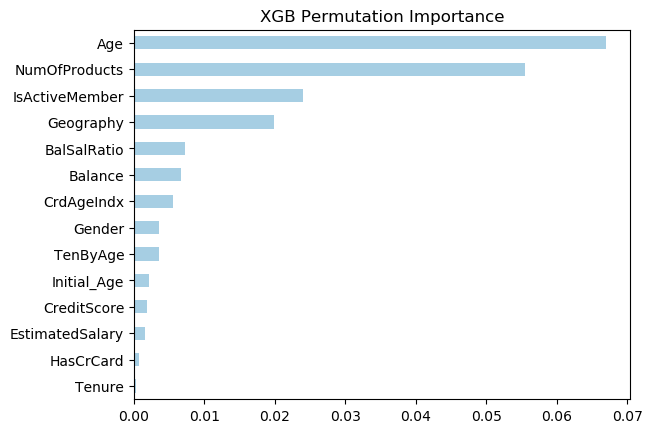

In [39]:
feature_names = X_val_encoder.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
pi.plot.barh()
plt.title("XGB Permutation Importance")

Text(0.5, 1.0, 'RFC Permutation Importance')

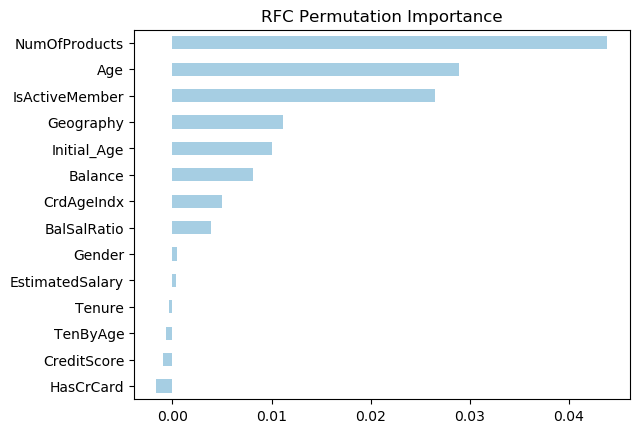

In [40]:
feature_names = X_val_encoder.columns.tolist()
pi = pd.Series(permuter2.feature_importances_, feature_names).sort_values()
pi.plot.barh()
plt.title("RFC Permutation Importance")

In [41]:
eli5.show_weights(
    permuter,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=feature_names,  # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0670 ± 0.0085,Age
0.0555 ± 0.0110,NumOfProducts
0.0240 ± 0.0114,IsActiveMember
0.0199 ± 0.0056,Geography
0.0073 ± 0.0044,BalSalRatio
0.0066 ± 0.0044,Balance
0.0055 ± 0.0029,CrdAgeIndx
0.0035 ± 0.0043,Gender
0.0035 ± 0.0032,TenByAge
0.0021 ± 0.0036,Initial_Age


In [42]:
eli5.show_weights(
    permuter2,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=feature_names,  # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0439 ± 0.0088,NumOfProducts
0.0289 ± 0.0056,Age
0.0265 ± 0.0100,IsActiveMember
0.0111 ± 0.0023,Geography
0.0100 ± 0.0040,Initial_Age
0.0081 ± 0.0055,Balance
0.0050 ± 0.0041,CrdAgeIndx
0.0039 ± 0.0018,BalSalRatio
0.0005 ± 0.0015,Gender
0.0004 ± 0.0017,EstimatedSalary


(<Figure size 1500x950 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f27bc4f0610>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f27bc4a4a60>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f27bc453220>}})

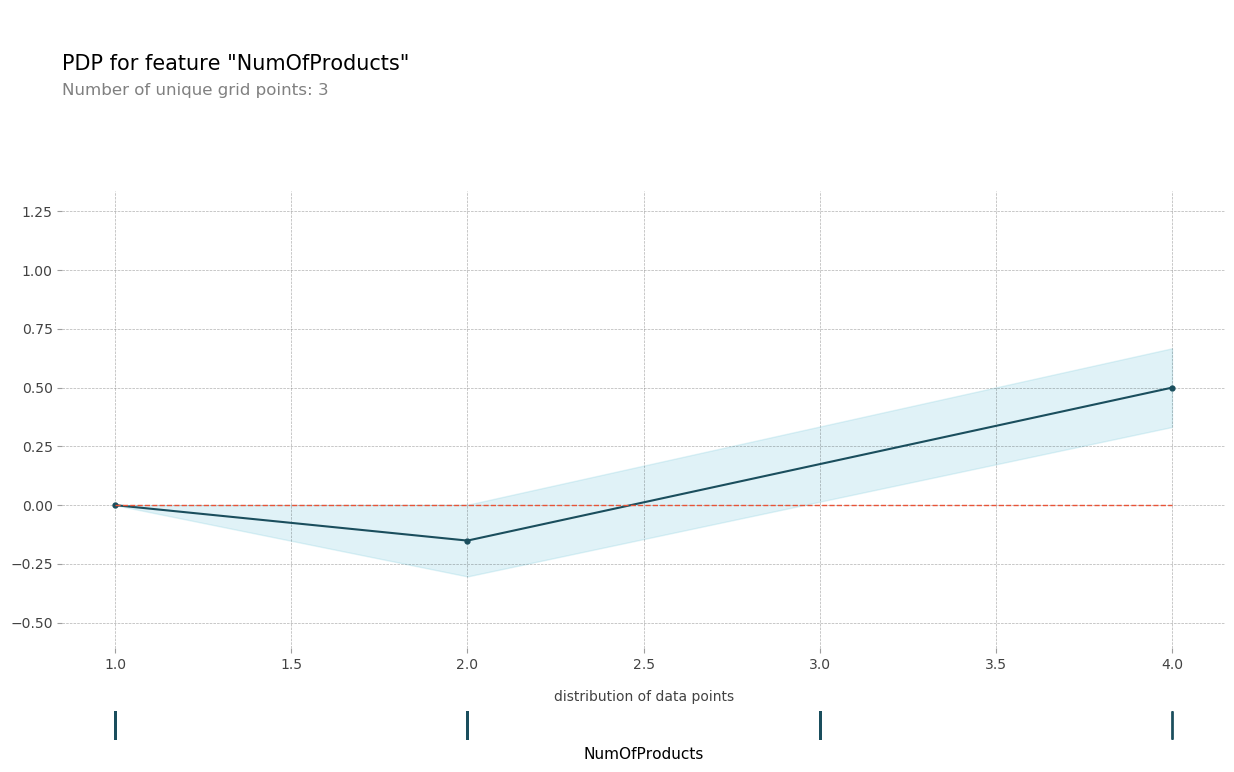

In [43]:
'''
1순위 NumOfProducts,Age
'''
target_feature = 'NumOfProducts'

isolated = pdp_isolate(
    model=clf_xgb,
    dataset=X_val_encoder,
    model_features=X_val_encoder.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, 
         feature_name=target_feature,
         plot_lines=False,  
         plot_pts_dist=True,)
     

(<Figure size 1500x950 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f27bc3d2340>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f27bc386340>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f27bc3a9ac0>}})

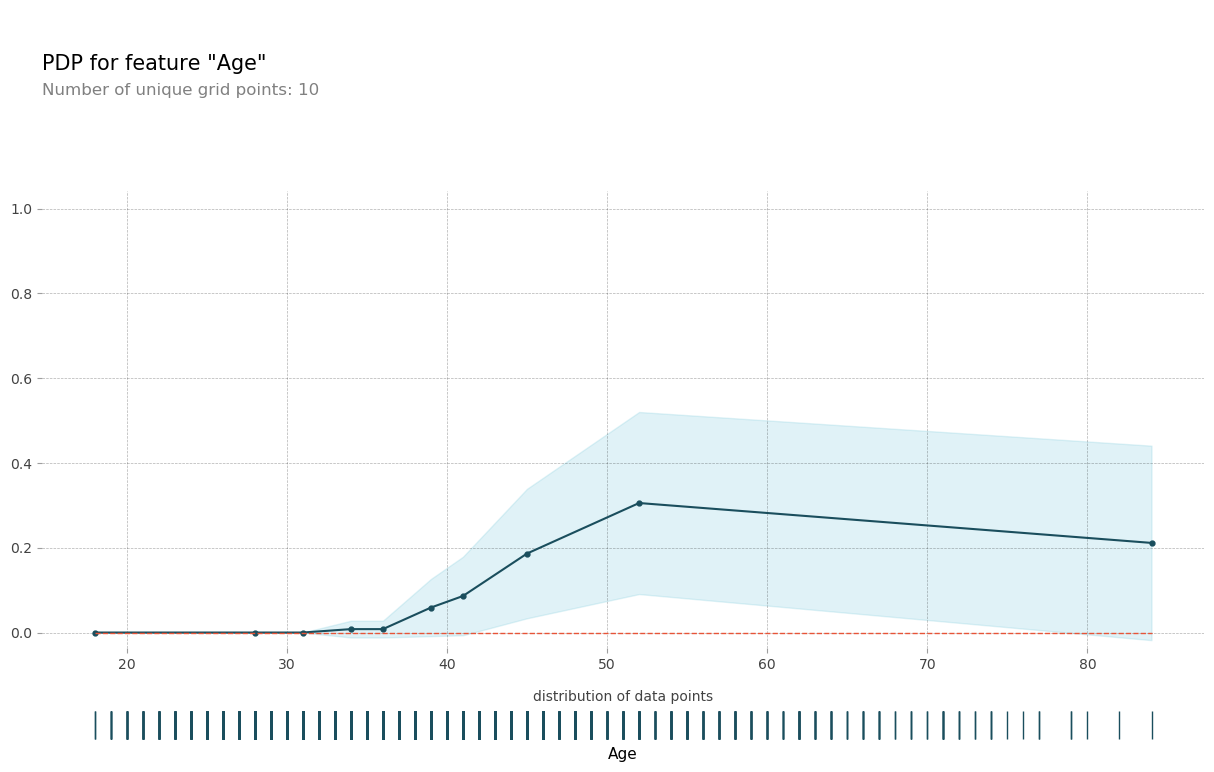

In [44]:
target_feature = 'Age'

isolated = pdp_isolate(
    model=clf_xgb,
    dataset=X_val_encoder,
    model_features=X_val_encoder.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, 
         feature_name=target_feature,
         plot_lines=False,  
         plot_pts_dist=True,)

(<Figure size 1500x950 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f27bc328580>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f27bc2cadf0>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f27bc2815e0>}})

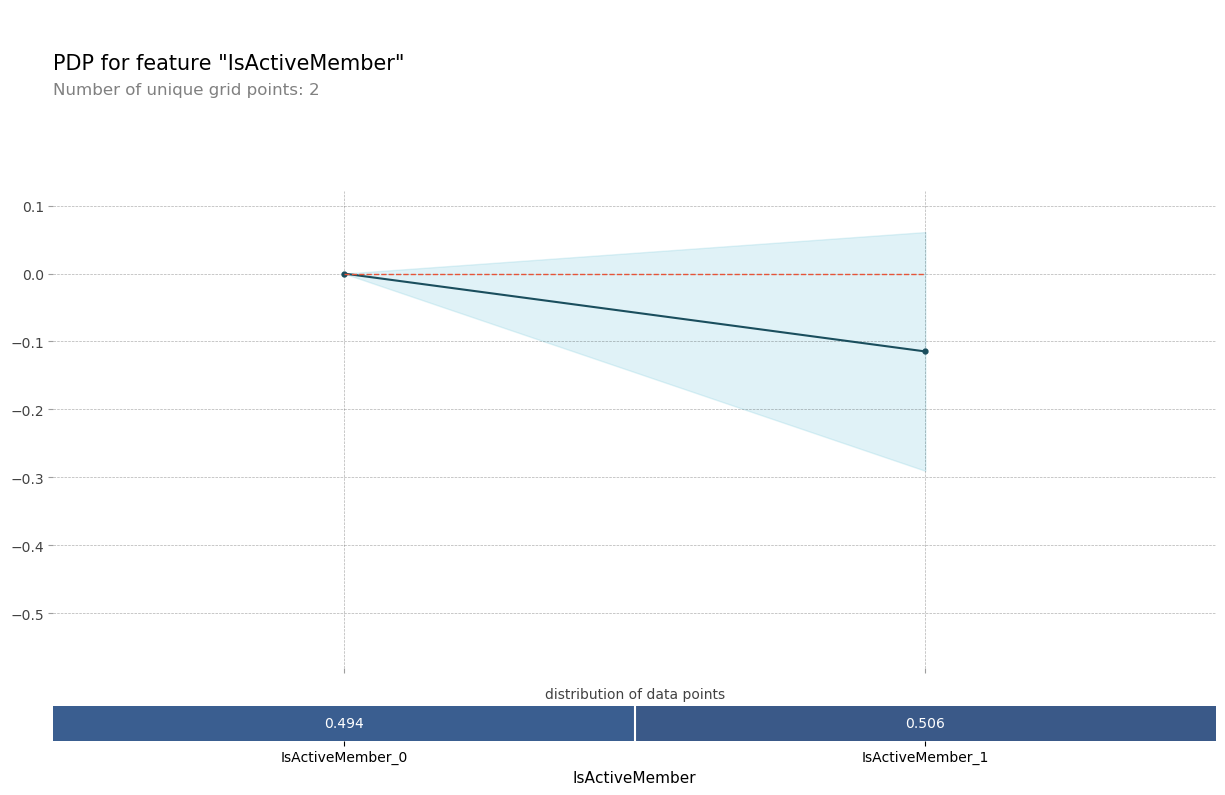

In [45]:
target_feature = 'IsActiveMember'

isolated = pdp_isolate(
    model=clf_xgb,
    dataset=X_val_encoder,
    model_features=X_val_encoder.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, 
         feature_name=target_feature,
         plot_lines=False,  
         plot_pts_dist=True,)

In [46]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

(<Figure size 750x950 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f27bc1f81f0>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f27bc1b5430>})

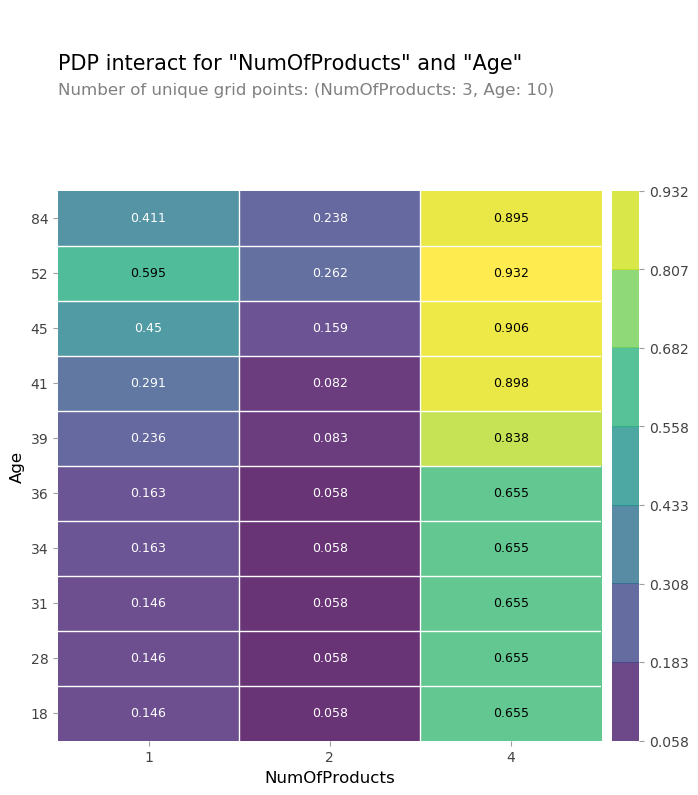

In [47]:
vars = ['NumOfProducts','Age']

interaction = pdp_interact(clf_xgb, dataset= X_val_encoder, model_features= list(X_val_encoder),
                            features=vars,
)
pdp_interact_plot(interaction, plot_type="grid", feature_names=vars)

### ICE plot
- 아무나 한명의 고객 혹은 새로 생성하여 그 사람 예측

In [48]:
# ICE plot 함수 생성
def ice_plot(data, var, id, model) :
    '''
    input 설명
        * data : 데이터셋
        * var : 특정 feature
        * id : 특정 인스턴스, 분석단위...
        * 설명할 모델
    '''

    temp = data.loc[[id]]
    var_values = data[var].sort_values().tolist()
    pred = []
    for v in var_values :
        temp[var] = v
        pred.append(model.predict_proba(temp)[0,1])

    plt.plot(var_values, pred, marker = '.')
    plt.grid()
    plt.show()

In [49]:
X_test_encoder.loc[[15813917]]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Initial_Age,BalSalRatio,TenByAge,CrdAgeIndx
CustomerId,,,,,,,,,,,,,,
15813917,653,3,2,31,9,143321.97,1,1,0,83679.46,22,1.71275,0.290323,21.064516


In [50]:
id = 15813917											
y_test_predict = clf_xgb.predict(X_test_encoder.loc[[id]])
if y_test_predict[0]==0:
  print(f"ID {id} 고객의 이탈 예측 결과 : 잔여")
else:
  print(f"ID {id} 고객의 이탈 예측 결과 : 이탈")

ID 15813917 고객의 이탈 예측 결과 : 잔여


In [51]:
import shap
explainer0 = shap.TreeExplainer(clf_xgb.best_estimator_)
shap_values0 = explainer0.shap_values(X_test_encoder)
shap.initjs()

index_loc = X_test_encoder.index.get_loc(15813917)
shap.force_plot(explainer0.expected_value, shap_values0[index_loc,:], X_test_encoder.iloc[index_loc,:])

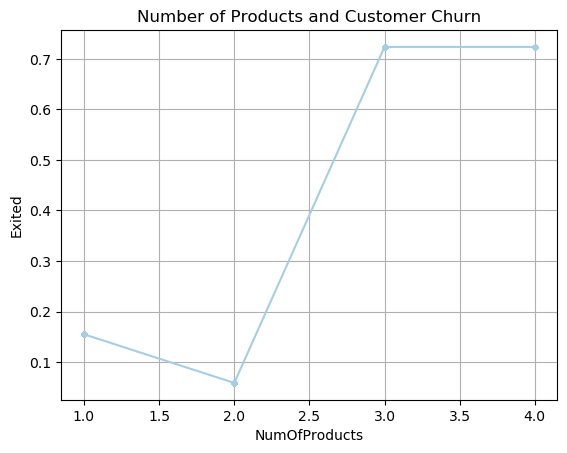

In [52]:
plt.xlabel("NumOfProducts")
plt.ylabel("Exited")
plt.title("Number of Products and Customer Churn")
ice_plot(X_test_encoder, 'NumOfProducts', 15813917, clf_xgb)

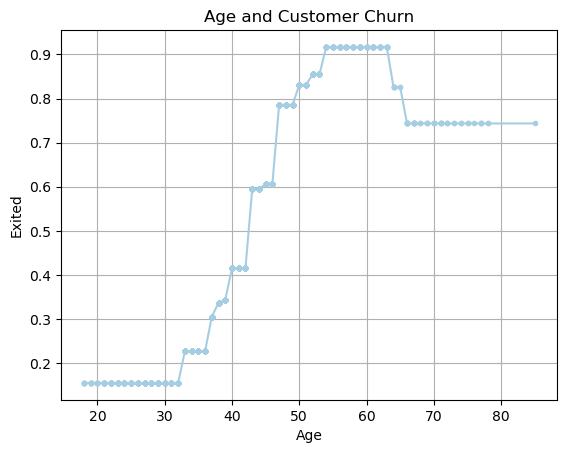

In [53]:
plt.xlabel("Age")
plt.ylabel("Exited")
plt.title("Age and Customer Churn")
ice_plot(X_test_encoder, 'Age', 15813917, clf_xgb)

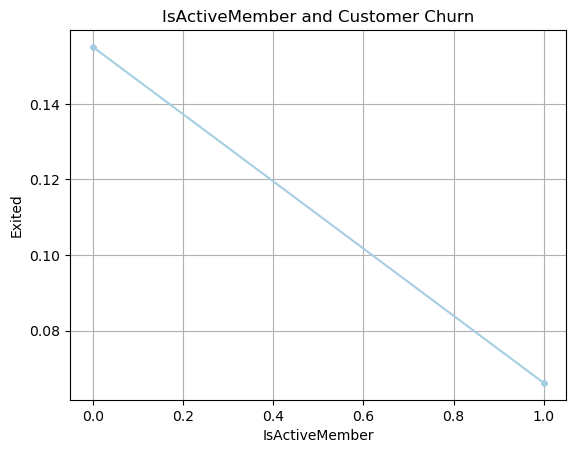

In [54]:
plt.xlabel("IsActiveMember")
plt.ylabel("Exited")
plt.title("IsActiveMember and Customer Churn")
ice_plot(X_test_encoder, 'IsActiveMember', 15813917, clf_xgb)

In [55]:
y_test_predict = clf_xgb.predict(X_test_encoder)
y_test_predict

array([0, 0, 0, ..., 1, 0, 0])

### 비지니스 인사이트 도출


In [56]:
params = {
      "n_estimators": np.arange(100,1100,100),
      "gamma": np.arange(1,21,1),
      "max_depth": np.arange(1,21,1),
      "min_child_weight": np.arange(1,21,1),
}

Optimal Hyperparameter: {'n_estimators': 600, 'min_child_weight': 20, 'max_depth': 19, 'gamma': 4}
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.76      0.50      0.60       407

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.85      2000

Test Average score: 0.8559954257105682


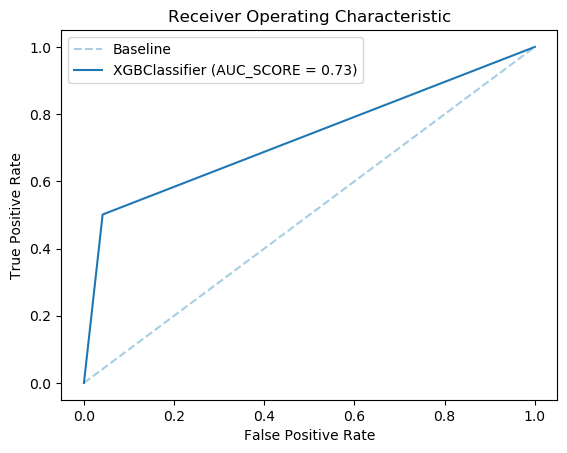

In [57]:
#XGBClassifier 랜덤 서치
model_xgb = XGBClassifier(
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
)
clf_xgb = RandomizedSearchCV(model_xgb, param_distributions=params, cv=3, n_iter=5, scoring='accuracy',random_state=42,verbose=0)
clf_xgb.fit(X_train_encoder, y_train)
print("Optimal Hyperparameter:", clf_xgb.best_params_)

y_test_pred_xgb = clf_xgb.predict(X_test_encoder)
print(classification_report(y_test, y_test_pred_xgb))
plt.plot([0, 1], [0, 1], linestyle="--", label="Baseline")
fpr, tpr, _ = roc_curve(y_test, y_test_pred_xgb)
auc_score = roc_auc_score(y_test, y_test_pred_xgb)
plt.plot(fpr, tpr, label=f"{type(clf_xgb.best_estimator_).__name__} (AUC_SCORE = {auc_score:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")

cv_scores_test = cross_val_score(clf_rfc, X_test_encoder, y_test, cv=3)

print("Test Average score:", np.mean(cv_scores_test))
plt.legend()
plt.show()


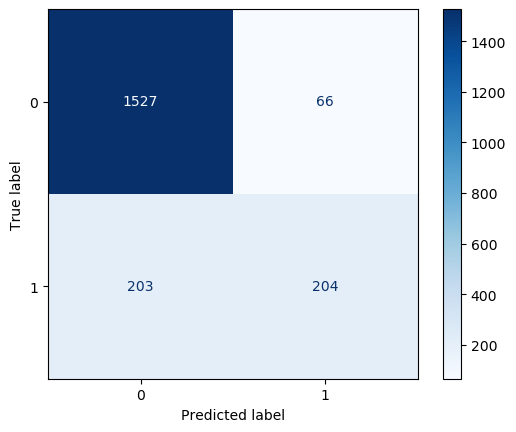

In [58]:
ConfusionMatrixDisplay.from_estimator(clf_xgb, X_test_encoder, y_test,cmap='Blues')
plt.show()

In [59]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 42)
X_train_encoder_d, y_train_d=rus.fit_resample(X_train_encoder, y_train)

Optimal Hyperparameter: {'n_estimators': 700, 'min_child_weight': 9, 'max_depth': 15, 'gamma': 14}
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1593
           1       0.47      0.76      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



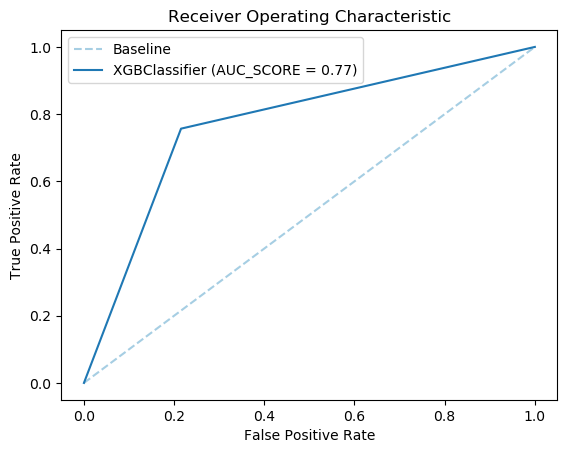

In [60]:
#XGBClassifier 랜덤 서치
model_xgb = XGBClassifier(
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
)
clf_xgb = RandomizedSearchCV(model_xgb, param_distributions=params, cv=3, n_iter=5, scoring='accuracy',random_state=42,verbose=0)
clf_xgb.fit(X_train_encoder_d, y_train_d)
print("Optimal Hyperparameter:", clf_xgb.best_params_)

y_test_pred_xgb = clf_xgb.predict(X_test_encoder)
print(classification_report(y_test, y_test_pred_xgb))
plt.plot([0, 1], [0, 1], linestyle="--", label="Baseline")
fpr, tpr, _ = roc_curve(y_test, y_test_pred_xgb)
auc_score = roc_auc_score(y_test, y_test_pred_xgb)
plt.plot(fpr, tpr, label=f"{type(clf_xgb.best_estimator_).__name__} (AUC_SCORE = {auc_score:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend()
plt.show()

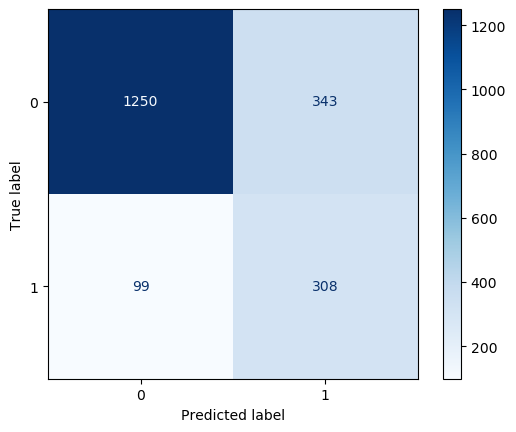

In [61]:
ConfusionMatrixDisplay.from_estimator(clf_xgb, X_test_encoder, y_test,cmap='Blues')
plt.show()